<a href="https://colab.research.google.com/github/Yullycadena19/Tarea/blob/main/Copia_de_23_Clase_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aprendizaje supervisado
### Regresión lineal y Logística

## https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score,confusion_matrix

In [2]:
source = 'https://raw.githubusercontent.com/nparis87/MachineLearning/main/CreditQuality.csv'

data = pd.read_csv(source, sep=';')

data.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,11,6,34,43,1169,65,75,4,93,101,...,121,67,143,152,2,173,1,192,201,0
1,12,48,32,43,5951,61,73,2,92,101,...,121,22,143,152,1,173,1,191,201,1
2,14,12,34,46,2096,61,74,2,93,101,...,121,49,143,152,1,172,2,191,201,0
3,11,42,32,42,7882,61,74,2,93,103,...,122,45,143,153,1,173,2,191,201,0
4,11,24,33,40,4870,61,73,3,93,101,...,124,53,143,153,2,173,2,191,201,1


In [3]:
data.shape

(1000, 21)

## Partiendo los datos

In [4]:
train = data.sample(800,random_state=10)
test = data.iloc[np.invert(data.index.isin(train.index))]

In [5]:
x_train=train

In [6]:
from re import X
x_train=train.iloc[:,0:-1]
y_train=train.iloc[:,-1]
x_test=test.iloc[:,0:-1]
y_test=test.iloc[:,-1]



## Entrenar el modelo

In [7]:
logist = LogisticRegression(max_iter=500)
logist.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [8]:
y_pred = logist.predict(x_test)

In [9]:
confusion_matrix(y_test, y_pred) # el 41 es un verdadero falso y el 11 es un falso positivo, 124 y 24 si son correctos

array([[124,  11],
       [ 41,  24]])

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       135
           1       0.69      0.37      0.48        65

    accuracy                           0.74       200
   macro avg       0.72      0.64      0.65       200
weighted avg       0.73      0.74      0.71       200



In [11]:
#logist.predict_proba(x_test_t)

TAREA
ANALIZAR LO QUE HICIMOS, SI ES CORRECTO O NO, DAR UNA REOCMENDACION AL BANCO DE RIESGO A ASUMIR, MEJORAR EL MODELO. MEJORAR EL MODELO CON UN MEJOR CODIGO

### K Nearest Neighbors

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
# what's next??
# Confusion matrix
# Classification report

## Overfitting test exercise

In [13]:
train = []
test = []
for n in range(3, 11, 2):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)

    pred_train = knn.predict(x_train)
    pred_test = knn.predict(x_test)

    train.append(accuracy_score(y_train, pred_train))
    test.append(accuracy_score(y_test, pred_test))

## Trabajo en Clase

Graph the overfitting test exercise. On the x axis goes the 'n'. On the Y axis graph the scores stored on the lists 'train' and 'test' as two independent series.

Normalize data and test classification results in logistic regression. Is there any improvement in classification?

Change the decision threshold so that the credit result is more strict in terms of credit allocation. What is the effect on ranking metrics?

TAREA

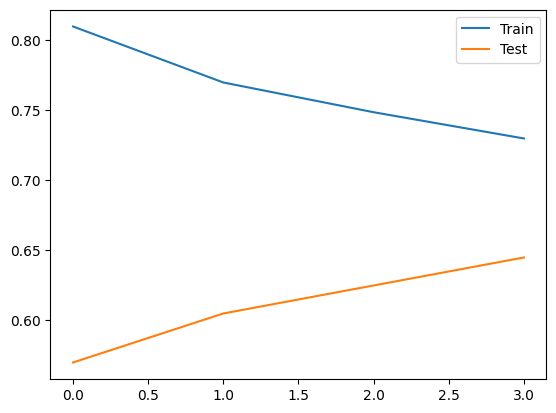

In [14]:
fig, ax = plt.subplots()
ax.plot(train, label='Train')
ax.plot(test, label='Test')
ax.legend()
plt.show()

In [15]:
modelo = LogisticRegression(max_iter=500)
modelo.fit(x_train, y_train)
y_pred = modelo.predict(x_test)
scaler = StandardScaler()
X_train_normal = scaler.fit_transform(x_train)
X_test_normal = scaler.transform(x_test)
modelo_normal = LogisticRegression(max_iter=500)
modelo_normal.fit(X_train_normal, y_train)
y_pred_normal = modelo_normal.predict(X_test_normal)
print(classification_report(y_test, y_pred_normal))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       135
           1       0.64      0.42      0.50        65

    accuracy                           0.73       200
   macro avg       0.70      0.65      0.66       200
weighted avg       0.72      0.73      0.72       200



Al normalizar los datos el modelo es mas preciso y se obtienen mejores resultados






In [16]:
(logist.predict_proba(x_test)[:, 0] > 0.3).sum()


188

El modelo se hace más estricto por lo que es más preciso, pero a la vez se estan perdiendo clientes nuevos